# Analysis of Graduate Admissions

The purpose of this anaylsis is to:
- Perform Exploratory Analysis to the dataset
- See if there is any correlation between any variables
- Help students in shortlisting universities with their profiles. 
- Predict output that gives them a fair idea about their chances for a particular university.

## Content

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya. 

The dataset contains several parameters which are considered important during the application for Masters Program. The parameters included are : 
1. **GRE Scores** ( out of 340 ) 
2. **TOEFL Scores** ( out of 120 ) 
3. **University Rating** ( out of 5 ) 
4. **Statement of Purpose and Letter of Recommendation Strength** ( out of 5 ) 
5. **Undergraduate GPA** ( out of 10 ) 
6. **Research Experience** ( either 0 or 1 ) 
7. **Chance of Admit** ( ranging from 0 to 1 )




## Exploring the Data

I start here by loading some libraries that I will use later such as pandas and matplotlib. From the first few rows of the data, everything looks good. 

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib 

data = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(data.head())


Using matplotlib backend: MacOSX
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


When looking into the dataset, there are no missing values. There are a total of 500 observations.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


## Correlation between all columns

* From the heatmap below: the 3 variables that have the highest correlation with the chance of getting admitted are:
    * CGPA = .88
    * GRE Score = .81
    * TOEFL Score = .79
    
* Also, there are a few variables that are corrleated with each.
    * GRE and TOEFL Score with .83
    * GRE and CGPA score with .83
    * CGPA and TOEFL score with .81

* These variables are highly correlated with each other ( Multicollinearity )

Multicollinearity increases the standard errors of the coefficients. Increased standard errors in turn means that coefficients for some independent variables may be found not to be significantly different from 0. In other words, by overinflating the standard errors, multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant.

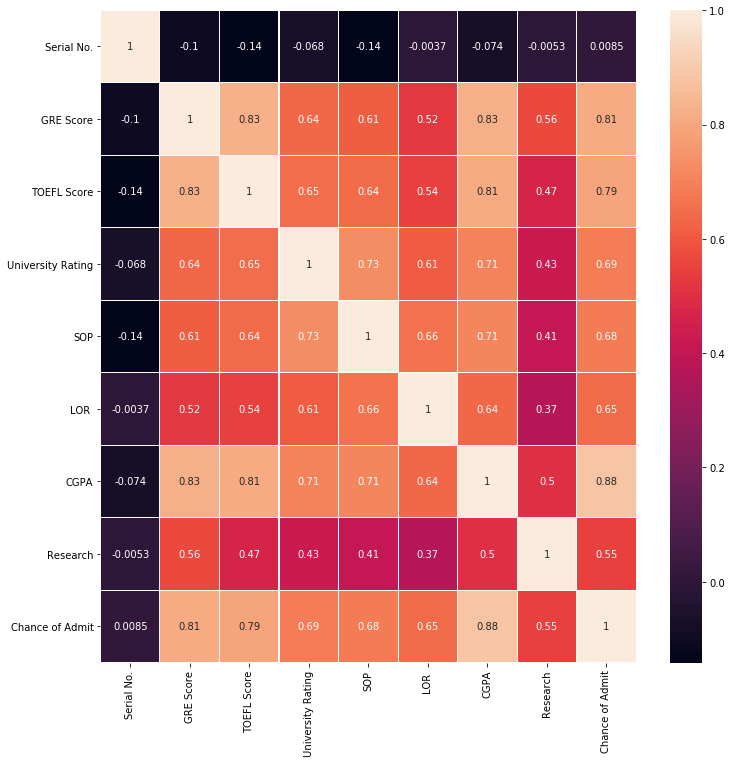

In [5]:
fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05)
plt.show()

## Data Visualization

Histograms of the variables (GRE, CGPA, and TOEFL scores)

By observing the histogram of GRE scores, the distribution is approximately normal with no outliers present.


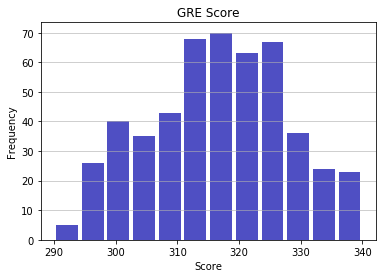

In [6]:
n, bins, patches = plt.hist(x= data['GRE Score'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('GRE Score')
plt.show()


Basedo on the histogram of CGPA, the distribution is approximately normal with no outliers present.

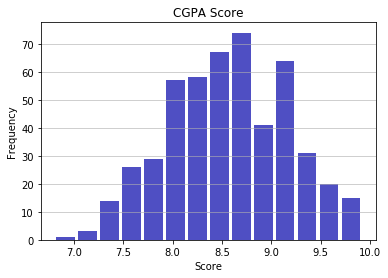

In [7]:
n, bins, patches = plt.hist(x= data['CGPA'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('CGPA Score')
plt.show()


Based on the histogram of TOEFL score, the distribution is approximately normal with no outliers present.

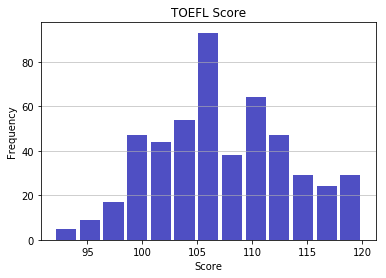

In [8]:
n, bins, patches = plt.hist(x= data['TOEFL Score'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('TOEFL Score')
plt.show()

When observing the histogram of Chance of Admit, you see the distribution is skewed to the left. 
Hence, there are more this dataset contains people with higher chances of getting in a master's program.

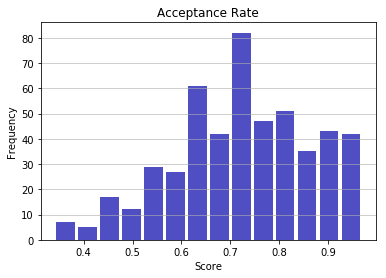

In [9]:
n, bins, patches = plt.hist(x= data['Chance of Admit'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Acceptance Rate')
plt.show()

## Scatterplot with predicors against response

When creating a scatterplot, you can see there is a postive correlation with each predictor against the response, chance of admit. This confirms with the result from the correlation matrix from above.

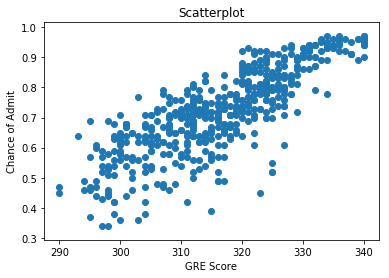

In [10]:
plt.scatter(data['GRE Score'], data['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot')
plt.show()

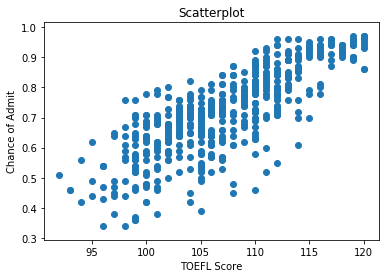

In [11]:
plt.scatter(data['TOEFL Score'], data['Chance of Admit'])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot')
plt.show()

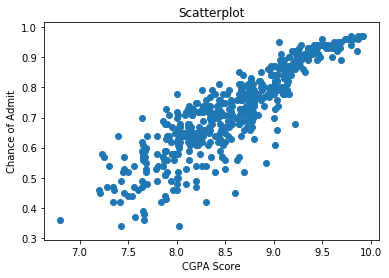

In [12]:
plt.scatter(data['CGPA'], data['Chance of Admit'])
plt.xlabel('CGPA Score')
plt.ylabel('Chance of Admit')
plt.title('Scatterplot')
plt.show()

## Regression Model

### Data Preparation

I first need to make a copy of the initial dataframe becuase I will be removing or cleaning some variables for the regression model.

In [13]:
df = data.copy()

df.drop(["Serial No."],axis=1,inplace = True)

I am using all the variables as predictors, so this will be my full model.
- The training set consists of 70% of the dataset.
- The testing set consists of 30% of the dataset.


In [14]:
y = df["Chance of Admit"].values #response variable
x = df.drop(["Chance of Admit"],axis=1) #predictors

from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

**Data Preprocessing for Machine Learning**

To accomplish the job, we will import the class StandardScaler from the sckit preprocessing library and as usual create an object of that class.

- Now we will fit and transform our testing and training set for x.
- This will transform all the data to the same standardized scale.

Standardized Scale: $x^{'} = \frac{x - \mu}{\sigma}$

where $x^{'}$ is the new value


In [15]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

sc_X = StandardScaler()

x_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

sc_y = StandardScaler()
y_train = y_train.reshape((len(y_train), 1))
y_train = sc_y.fit_transform(y_train)
y_train = y_train.ravel()


**Variance Inflation Factor (VIF)**

Multicollinearity is a common problem when estimating linear or generalized linear models, including logistic regression and Cox regression. It occurs when there are high correlations among predictor variables, leading to unreliable and unstable estimates of regression coefficients. 

When observing the table, all the variable's vif factor are not too high (less than 5).

- The only questionable predictors are:
    - GRE Score vif = 4.53
    - CGPA vif = 4.7


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train, i) for i in range(x_train.shape[1])]
vif["features"] = x.columns

vif

,VIF Factor,features
0,4.526831,GRE Score
1,3.497877,TOEFL Score
2,2.679544,University Rating
3,2.908001,SOP
4,1.989814,LOR
5,4.699733,CGPA
6,1.510207,Research


After fitting the model and seeing the p-values, we can see that all the predicators are significant (<.05) but 
x3 and x4.

- x1 = GRE Score (coefficient = .1748)
- x2 = TOEFL Score (coefficient = .1488)
- x3 = University Rating (coefficient = .0256)
- x4 = SOP (coefficient = .0108)
- x5 = LOR (coefficient = .1002)
- x6 = CGPA (coefficient = .4932)
- x7 = Research (coefficient = .0738


- x3 = University Rating (pvalue = .497)
- x4 = SOP (pvalue = .783)
- $R^2$ = .818

In [20]:
import statsmodels.api as sm

model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     220.5
Date:                Thu, 23 May 2019   Prob (F-statistic):          7.75e-123
Time:                        20:05:52   Log-Likelihood:                -198.30
No. Observations:                 350   AIC:                             410.6
Df Residuals:                     343   BIC:                             437.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1748      0.049      3.568      0.0

## Residual Analysis

From the histagram of the residuals, we can see that they are approximately normal distribution (slight skewed). There might be some indication of outliers.

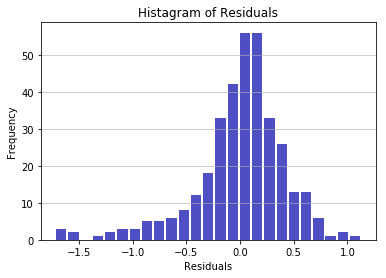

In [21]:
residuals = results.resid
fitted = results.fittedvalues

n, bins, patches = plt.hist(x= residuals, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histagram of Residuals')
plt.show()

When observing the residuals against the fitted values, majority of them form a horizontal band around zero. Slight pattern can be seen also.

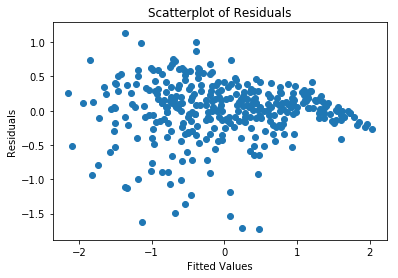

In [22]:
plt.scatter(fitted,residuals)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Scatterplot of Residuals')
plt.show()

When observing the QQplot, there is a s shaped pattern seen, which confirms with the histagram

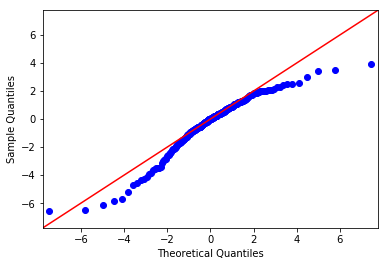

In [23]:
import scipy.stats as stats

fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

From the boxplot, we can clearly see outliers that were questionable from the histagram.

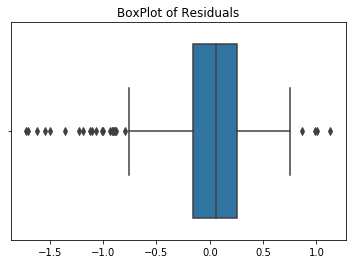

In [24]:
sns.boxplot(pd.DataFrame(residuals))
plt.title('BoxPlot of Residuals')
plt.show()

## Navie Bayes

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. 

### Context

- I converted the values of the response to two values
    - If the chance of getting admitted is >= .85 then the new value is 1.
    - If the chance of getting addmited < .85 then the new value is 0.

In [25]:

y2 = y.copy()

y2 = [1 if each >= 0.85 else 0 for each in y2]
y2 = np.array(y2)

When converting the response to 0s and 1s you see that there are more students in the dataset that have lower probability of getting accepted into a master's school.

In [27]:
length_y2 = 500

count_1 = sum(y2)
count_0 = length_y2 - count_1

print('Number of 1s = ', count_1)
print('Number of 0s = ', count_0)

Number of 1s =  109
Number of 0s =  391


From the barplot, you can see the distribution is skewed.

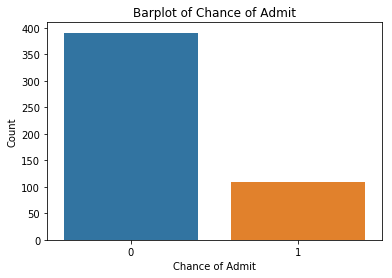

In [28]:
sns.barplot([0,1], [count_0, count_1])
plt.xlabel('Chance of Admit')
plt.ylabel('Count')
plt.title('Barplot of Chance of Admit')
plt.show()

The split ratio for the training/testing is 30/70:

- 30% of data = testing 
- 70% of data = training

In [29]:
from sklearn.model_selection import train_test_split

x2_train, x2_test,y2_train, y2_test = train_test_split(x,y2,test_size = 0.30,random_state = 42)

In [30]:
# standardizing data

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

x2_train = sc_X.fit_transform(x2_train)
x2_test = sc_X.transform(x2_test)


## Gaussian Naive Bayes Classifier

**GaussianNB** implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

$$P(x_i | y_i) = \frac{1}{\sqrt{2\pi\sigma^{2}_y}}exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y})$$

In [31]:
#Fitting a naive bayes classifyer

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
fit = gnb.fit(x2_train,y2_train)


**Accuracy of model**

- After fitting the model, the accuracy of the testing data is 95.33%


In [34]:
#Calculating accuaracy for training and testing 

from sklearn import metrics

pred_train = gnb.predict(x2_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y2_train, pred_train)))

pred_test = gnb.predict(x2_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y2_test, pred_test)))


Prediction accuracy for the training dataset
95.43%

Prediction accuracy for the test dataset
95.33%



**Confusion Matrix**

- Number of 0s in the testing set: 112
    - Number of Correct Predictions: 111
    - Number of Incorrect Predictions: 1
    
    
- Number of 1s in the testing set: 38
    - Number of Correct Predictions: 32
    - Number of Incorrect Predictions: 6
    


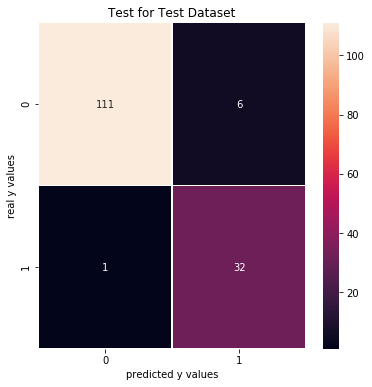

In [35]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y2_test, pred_test)

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(confu,annot = True,linewidths=0.5,fmt = ".0f")
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()


# Conclusion

When seeing the correlation matrix, there are several variables that are correlated with the response (CGPA, TOEFL and GRE Score). However, there are also several variables that are correlated with each other.

**Regression Model**
- When fitting a linear regression, there are two variables that have a p-value greater than .05 (University Rating and SOP).
- There is no variable with a vif greater than five. However, there are two variables that are close (GRE and CGPA)
- The proportion of the results variance that can be explained by the model is .818
- Since University Rating and SOP have high p-values we can remove them from the model.

**Naive Bayes Classifier**
- Data Preparation:
    - If chance of admit >= .85, then chance of admit = 1
    - If chance of admit < .85, then chance of admit = 0
- Number of 1s =  109
- Number of 0s =  391


- After fitting a Gaussian Naive Bayes, the accuracy of the model is 95.33%


- Confusion Matrix:
- Number of 0s in the testing set: 112
    - Number of Correct Predictions: 111
    - Number of Incorrect Predictions: 1
- Number of 1s in the testing set: 38
    - Number of Correct Predictions: 32
    - Number of Incorrect Predictions: 6
